
a.检查异常值情况:



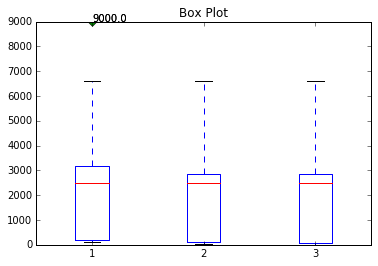


b.检查缺失值情况:

恭喜您,该数据集不存在缺失值！


c.检查重复值情况:

该数据集存在 1 行重复值！


In [3]:
#-*- coding: utf-8 -*-
import Ipynb_importer #导入ipythonnotebook文件，实现jupyter文件的解析调用
import Data_Get 
import matplotlib.pyplot as plt
import pandas as pd

# **************
# 输入数据
# **************
data=Data_Get.get_ExcelData() #获取数据
data=data.head(20)


# **************
# a.检查异常值情况——箱体图方式显示
# **************
print ("\na.检查异常值情况:\n")
#取数值
outlierdata=data.values
#画图
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Box Plot')
p=ax.boxplot(outlierdata,flierprops=green_diamond)
# 显示异常数据的数值
for i in range(outlierdata.shape[1]): 
    x=p['fliers'][i].get_xdata()
    y=p['fliers'][i].get_ydata()
    if len(x)<> 0:
        y.sort()
        plt.annotate(y[0], xy = (x[0],y[0]), xytext = (x[0],y[0]))#显示最小值坐标
        plt.annotate(y[len(y)-1], xy = (x[len(y)-1],y[len(y)-1]), xytext = (x[len(y)-1],y[len(y)-1]))#显示最大值坐标
#输出图像
plt.show()


# **************
# b.检查缺失值情况——是否存在缺失值,并显示存在的数量是多少
# **************
print ("\nb.检查缺失值情况:\n")
nandata=pd.DataFrame(index=['all','noNAN','NAN'],columns=data.count().index)
nandata.loc[['all'],:]=data.shape[0]
nandata.loc[['noNAN'],:]=data.count().values
nandata.loc[['NAN'],:]=nandata.loc['all'].values-nandata.loc['noNAN'].values
nandata=nandata.T[nandata.T['NAN'] > 0]
if nandata.empty:
    print ("恭喜您,该数据集不存在缺失值！\n")
else:
    print ("该数据集存在缺失值情况如下：\n")
    print nandata

    
# **************
# c.检查重复值情况
# **************
print ("\nc.检查重复值情况:\n")
if data.shape[0]==data.drop_duplicates().shape[0]:
    print ("恭喜您,该数据集不存在重复值！\n")
else:
    print ("该数据集存在 %d 行重复值！" % (data.shape[0]-data.drop_duplicates().shape[0]))